### Import:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

### Data Loading:

In [27]:
df = pd.read_csv("data/WB_data.csv")

In [28]:
df.describe()

,1970 [YR1970],1980 [YR1980],1990 [YR1990],2000 [YR2000],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
count,6.710000e+02,9.270000e+02,1.214000e+03,1.724000e+03,1.819000e+03,1.844000e+03,1.862000e+03,1.841000e+03,1.839000e+03,1.844000e+03,1.852000e+03,1.791000e+03,1.626000e+03,1.505000e+03,1.483000e+03
mean,3.262905e+10,9.158516e+10,1.397062e+11,1.449068e+11,2.942391e+11,3.259375e+11,3.310890e+11,3.470113e+11,3.578802e+11,3.356813e+11,3.388141e+11,3.750690e+11,4.396791e+11,4.822949e+11,4.753720e+11
std,2.198046e+11,7.038301e+11,1.258840e+12,1.542241e+12,2.817496e+12,3.101364e+12,3.146242e+12,3.257519e+12,3.348949e+12,3.163476e+12,3.209918e+12,3.474132e+12,3.879248e+12,4.090059e+12,4.020368e+12
min,1.458090e+00,9.376000e-01,1.040710e+00,1.012180e+00,1.117610e+00,8.503200e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.465560e+00,1.370930e+00,1.271740e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.007720e+05,9.535365e+01,1.133059e+02,7.679329e+01,7.221700e+01,7.263830e+01,6.484610e+01,7.003521e+01,6.815400e+01,6.333402e+01,6.983067e+01,1.400000e+01,1.200000e+01,1.100000e+01,1.100000e+01
50%,1.499688e+07,4.508992e+06,3.732065e+05,3.067762e+03,3.124518e+03,2.923137e+03,2.371143e+03,3.119877e+03,3.381323e+03,3.079586e+03,2.973455e+03,5.046048e+03,1.761058e+04,4.057780e+04,4.135420e+04
75%,5.179353e+08,5.737343e+08,4.251313e+08,8.799690e+07,1.576303e+08,1.530458e+08,1.412512e+08,1.747261e+08,1.812853e+08,1.743496e+08,1.526025e+08,2.185012e+08,5.460482e+08,9.578739e+08,9.312235e+08
max,3.001560e+12,1.141916e+13,2.282261e+13,3.383939e+13,6.651417e+13,7.395779e+13,7.560398e+13,7.775137e+13,7.989439e+13,7.535966e+13,7.658803e+13,8.155096e+13,8.668687e+13,8.794557e+13,8.557772e+13


In [29]:
df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1970 [YR1970]', '1980 [YR1980]', '1990 [YR1990]', '2000 [YR2000]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    2394 non-null   object 
 1   Series Code    2394 non-null   object 
 2   Country Name   2394 non-null   object 
 3   Country Code   2394 non-null   object 
 4   1970 [YR1970]  671 non-null    float64
 5   1980 [YR1980]  927 non-null    float64
 6   1990 [YR1990]  1214 non-null   float64
 7   2000 [YR2000]  1724 non-null   float64
 8   2010 [YR2010]  1819 non-null   float64
 9   2011 [YR2011]  1844 non-null   float64
 10  2012 [YR2012]  1862 non-null   float64
 11  2013 [YR2013]  1841 non-null   float64
 12  2014 [YR2014]  1839 non-null   float64
 13  2015 [YR2015]  1844 non-null   float64
 14  2016 [YR2016]  1852 non-null   float64
 15  2017 [YR2017]  1791 non-null   float64
 16  2018 [YR2018]  1626 non-null   float64
 17  2019 [YR2019]  1505 non-null   float64
 18  2020 [YR

### Data wrangling:

In [31]:
#Creation of a header dictionary, to rename the years columns.
header_dict = {k: int(k[:4]) for k in df.columns.to_list()[4:]}
df = df.rename(header_dict, axis=1)

In [32]:
# Show the renamed columns
df.columns

Index([ 'Series Name',  'Series Code', 'Country Name', 'Country Code',
                 1970,           1980,           1990,           2000,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020],
      dtype='object')

In [33]:
# Bring data into a coherent long format
df_t=df.melt(id_vars=df.columns.to_list()[:4])
df_t

,Series Name,Series Code,Country Name,Country Code,variable,value
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,1970,1.075297e+07
1,"Population, total",SP.POP.TOTL,Albania,ALB,1970,2.135479e+06
2,"Population, total",SP.POP.TOTL,Algeria,DZA,1970,1.379592e+07
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,1970,2.707500e+04
4,"Population, total",SP.POP.TOTL,Andorra,AND,1970,1.986000e+04
...,...,...,...,...,...,...
35905,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,Sub-Saharan Africa,SSF,2020,4.005756e+03
35906,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,Sub-Saharan Africa (excluding high income),SSA,2020,4.003442e+03
35907,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,Sub-Saharan Africa (IDA & IBRD countries),TSS,2020,4.005756e+03
35908,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,Upper middle income,UMC,2020,1.713901e+04


In [34]:
# Get data into a usable wide format
df_t1=df_t.pivot(columns="Series Name", index=["Country Code", "variable"], values="value").reset_index()
df_t1

Series Name,Country Code,variable,Adjusted savings: education expenditure (current US$),"Compulsory education, duration (years)",GDP (current US$),"GDP per capita, PPP (current international $)","Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
0,ABW,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59106.0,NaN
1,ABW,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62267.0,NaN
2,ABW,1990,3.591697e+07,NaN,7.648045e+08,20754.231459,NaN,NaN,NaN,65712.0,NaN
3,ABW,2000,7.572675e+07,NaN,1.873453e+09,30750.475341,4.71536,106.07735,95.905182,89101.0,NaN
4,ABW,2010,1.522222e+08,NaN,2.453597e+09,34232.726741,6.75099,101.15607,NaN,100341.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3985,ZWE,2016,3.438495e+08,7.0,2.054868e+10,2825.357165,5.47300,NaN,88.309898,14452704.0,NaN
3986,ZWE,2017,2.978407e+08,7.0,1.758489e+10,2435.794358,5.81878,NaN,90.340347,14751101.0,NaN
3987,ZWE,2018,6.387594e+08,7.0,3.415607e+10,2611.326409,2.05049,NaN,92.572067,15052184.0,NaN
3988,ZWE,2019,4.104177e+08,7.0,2.183223e+10,2711.529334,NaN,NaN,92.934624,15354608.0,NaN


### Excluding Regional grouped data from df_t1

In [35]:
# Get the unique regional values (start from row 2017)
excl_list=list(df[df["Series Code"] == "SP.POP.TOTL"][217:]["Country Code"])
# Exclude the identified regional groups
df_t1=df_t1[~df_t1["Country Code"].isin(excl_list)]

## Ploting

In [36]:
# Prepare data for plotting
df_plot = df_t1.copy().T
# Set country codes as column headers
df_plot.columns = df_plot.iloc[0]
# Drop row of country codes
df_plot = df_plot.drop(["Country Code","variable"])

### Missing values

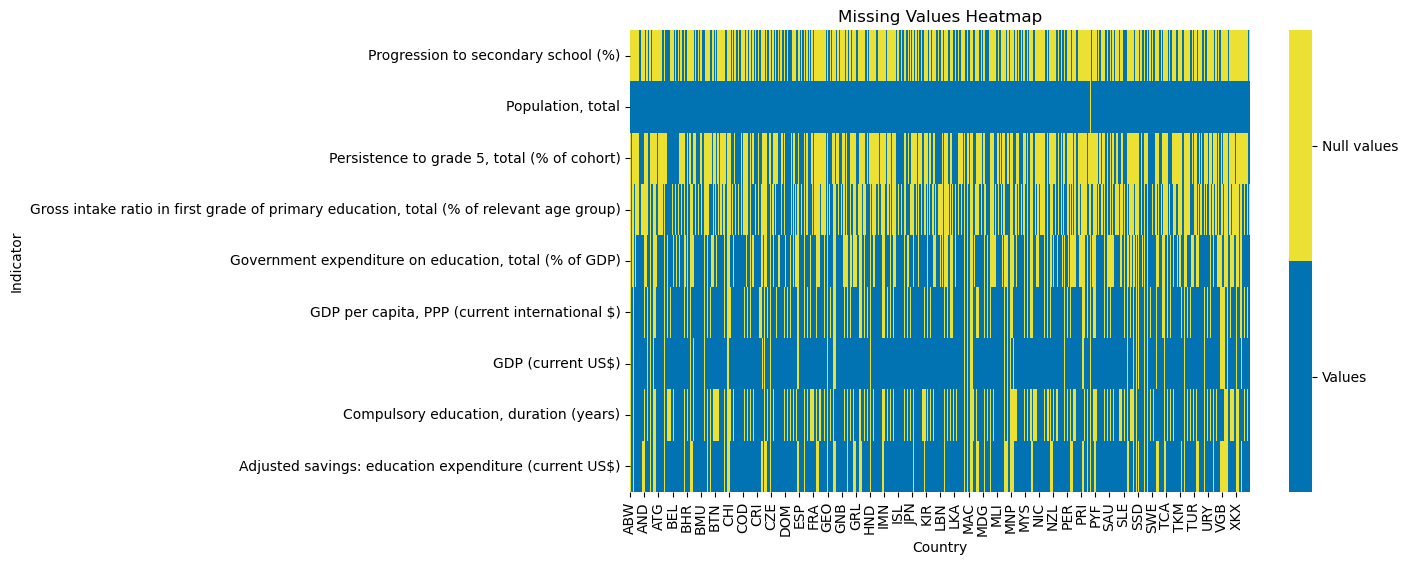

In [37]:
# Plot the actual figure
plt.figure(figsize=(10, 6))
# Generate a color map for binary classification (True vs False)
colors = (sns.color_palette("colorblind")[0], sns.color_palette("colorblind")[8])
cmap = LinearSegmentedColormap.from_list("Binary", colors, len(colors))
ax = sns.heatmap(df_plot.isnull(), cmap=cmap)
plt.title('Missing Values Heatmap')

# Manually changing the colorbar after it's generation
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['Values', 'Null values'])

# X - Y axis labels
ax.set_ylabel('Indicator')
ax.set_xlabel('Country')
ax.invert_yaxis()

plt.show()

In [38]:
# Count NAs across dataframe
df_t1.isna().sum()

Series Name
Country Code                                                                                  0
variable                                                                                      0
Adjusted savings: education expenditure (current US$)                                       588
Compulsory education, duration (years)                                                      950
GDP (current US$)                                                                           252
GDP per capita, PPP (current international $)                                               684
Government expenditure on education, total (% of GDP)                                      1225
Gross intake ratio in first grade of primary education, total (% of relevant age group)    1702
Persistence to grade 5, total (% of cohort)                                                2084
Population, total                                                                             2
Progression to secondary sch

In [39]:
# Show NULLs by year
nulls = df_t1.copy()
nulls = nulls.set_index("variable").iloc[:,1:].isnull()
nulls.groupby(["variable"]).sum()


Series Name,Adjusted savings: education expenditure (current US$),"Compulsory education, duration (years)",GDP (current US$),"GDP per capita, PPP (current international $)","Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
variable,,,,,,,,,
1970,104,217,76,217,188,202,200,1,208
1980,85,216,62,217,155,139,151,1,164
1990,61,216,29,31,168,140,160,0,176
2000,33,53,14,23,98,79,138,0,117
2010,29,27,7,17,71,70,128,0,109
2011,27,26,4,16,67,71,123,0,104
2012,28,26,6,18,56,68,115,0,103
2013,27,24,6,17,56,72,130,0,107
2014,26,24,5,18,52,71,137,0,106


### Correlations

In [40]:
# Calculate an actual correlation matrix
corr = df_t1.iloc[:,2:].corr()
# Plot with pandas inbuilt plotting function
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

Series Name,Adjusted savings: education expenditure (current US$),"Compulsory education, duration (years)",GDP (current US$),"GDP per capita, PPP (current international $)","Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
Series Name,,,,,,,,,
Adjusted savings: education expenditure (current US$),1.00,0.13,0.95,0.22,0.08,-0.03,0.10,0.33,0.14
"Compulsory education, duration (years)",0.13,1.00,0.09,0.22,0.16,-0.23,0.24,-0.04,0.28
GDP (current US$),0.95,0.09,1.00,0.18,0.04,-0.02,0.10,0.51,0.13
"GDP per capita, PPP (current international $)",0.22,0.22,0.18,1.00,0.05,-0.18,0.46,-0.06,0.37
"Government expenditure on education, total (% of GDP)",0.08,0.16,0.04,0.05,1.00,-0.08,0.31,-0.06,0.22
"Gross intake ratio in first grade of primary education, total (% of relevant age group)",-0.03,-0.23,-0.02,-0.18,-0.08,1.00,-0.35,0.02,-0.03
"Persistence to grade 5, total (% of cohort)",0.10,0.24,0.10,0.46,0.31,-0.35,1.00,0.02,0.53
"Population, total",0.33,-0.04,0.51,-0.06,-0.06,0.02,0.02,1.00,-0.01
Progression to secondary school (%),0.14,0.28,0.13,0.37,0.22,-0.03,0.53,-0.01,1.00


##### Correlation without NULLs

In [41]:
# Calculate an actual correlation matrix
df_t2 = df_t1[(df_t1["variable"] >= 2000) & (df_t1["variable"] <= 2017)]
corr = df_t2.dropna().iloc[:,2:].corr()
# Plot with pandas inbuilt plotting function
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

Series Name,Adjusted savings: education expenditure (current US$),"Compulsory education, duration (years)",GDP (current US$),"GDP per capita, PPP (current international $)","Government expenditure on education, total (% of GDP)","Gross intake ratio in first grade of primary education, total (% of relevant age group)","Persistence to grade 5, total (% of cohort)","Population, total",Progression to secondary school (%)
Series Name,,,,,,,,,
Adjusted savings: education expenditure (current US$),1.00,0.17,0.97,0.33,0.13,-0.14,0.26,0.39,0.27
"Compulsory education, duration (years)",0.17,1.00,0.15,0.15,0.16,-0.34,0.25,-0.03,0.31
GDP (current US$),0.97,0.15,1.00,0.28,0.05,-0.13,0.22,0.52,0.24
"GDP per capita, PPP (current international $)",0.33,0.15,0.28,1.00,0.21,-0.25,0.46,-0.09,0.46
"Government expenditure on education, total (% of GDP)",0.13,0.16,0.05,0.21,1.00,-0.17,0.37,-0.08,0.35
"Gross intake ratio in first grade of primary education, total (% of relevant age group)",-0.14,-0.34,-0.13,-0.25,-0.17,1.00,-0.56,-0.02,-0.30
"Persistence to grade 5, total (% of cohort)",0.26,0.25,0.22,0.46,0.37,-0.56,1.00,-0.02,0.56
"Population, total",0.39,-0.03,0.52,-0.09,-0.08,-0.02,-0.02,1.00,-0.03
Progression to secondary school (%),0.27,0.31,0.24,0.46,0.35,-0.30,0.56,-0.03,1.00


### Regression

## Alternative to get WB data

In [116]:
import wbgapi as wb


In [117]:
df_wb = wb.data.DataFrame(series=['SP.POP.TOTL', 'NY.ADJ.AEDU.CD', 'SE.XPD.TOTL.GD.ZS','SE.SEC.PROG.ZS', 'SE.PRM.PRS5.ZS', 'SE.PRM.GINT.ZS', "NY.GDP.MKTP.CD"], time=range(1990, 2021))

In [25]:
df["Series Code"].unique()

array(['SP.POP.TOTL', 'NY.ADJ.AEDU.CD', 'SE.XPD.TOTL.GD.ZS',
       'SE.SEC.PROG.ZS', 'SE.PRM.PRS5.ZS', 'SE.PRM.GINT.ZS',
       'NY.GDP.MKTP.CD', 'SE.COM.DURS'], dtype=object)